## Grupo 1
### Pregunta 5

Escribe un programa que agrupe sitios masivos de redes sociales en línea (MOSN) por el número de usuarios registrados y el ranking global de páginas de Alexa. Analiza facebook.

Debido a que los rangos y tamaños de los sitios varían en un amplio rango, usa una escala logarítmica tanto para el clustering como para la presentación. 
Utiliza el conjunto de datos 'mosn.csv'

### Solución

Text(0, 0.5, 'Alexa Rank')

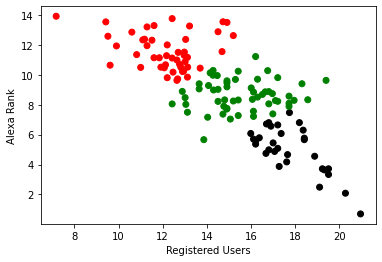

In [57]:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


pages = pd.read_csv('mosn.csv', thousands=',', names=('Name', 'Description', 'Date', 'Registered Users', 'Registration', 'Alexa Rank'))


registeded_users  = pages[["Name" , "Registered Users" , "Alexa Rank"]] # separar las columnas Name, Registered Users y Alexa Rank
registeded_users  = registeded_users.dropna() # eliminar aquellas filas que tengan NaN
registeded_users[["Registered Users" , "Alexa Rank"]] = np.log(registeded_users[["Registered Users" , "Alexa Rank"]]) # a escala logarítmica


kmeans  = KMeans(n_clusters=3, random_state=0).fit(registeded_users[["Registered Users" , "Alexa Rank"]])# generar un K-mean de 3 clusters
centers = kmeans.cluster_centers_ #cálculo de los centros


labels = kmeans.labels_.astype(float) #etiquetado de pertenencia de cada registro para clustering (red, green and black)
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2 : 'g',
                   }
label_color = [LABEL_COLOR_MAP[l] for l in labels]


plt.scatter(registeded_users[["Registered Users"]],registeded_users[["Alexa Rank"]],c=label_color)
plt.xlabel('Registered Users')
plt.ylabel('Alexa Rank')

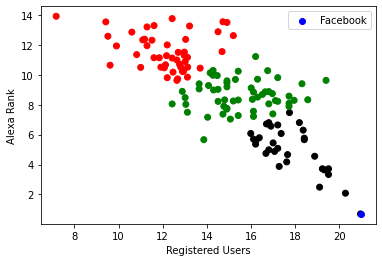

In [56]:
#Analizando Facebook

facebook_row = pages.loc[pages['Name'] == "Facebook"]
facebook_row  = facebook_row[["Name" , "Registered Users" , "Alexa Rank"]] # separar las columnas Name, Registered Users y Alexa Rank
facebook_row[["Registered Users" , "Alexa Rank"]] = np.log(facebook_row[["Registered Users" , "Alexa Rank"]]) # a escala logarítmica

plt.scatter(registeded_users[["Registered Users"]],registeded_users[["Alexa Rank"]] ,c=label_color)
plt.scatter(facebook_row[["Registered Users"]],facebook_row[["Alexa Rank"]] ,c="b", label = "Facebook")
plt.xlabel('Registered Users')
plt.ylabel('Alexa Rank')
plt.legend()